In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold , cross_val_score, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/glass.csv")
df.shape

(214, 10)

In [4]:
X = df.drop("Type", axis = 1)
y = df["Type"]

In [5]:
X.shape

(214, 9)

In [6]:
y.shape

(214,)

In [7]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


____

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160, 9), (160,), (54, 9), (54,))

In [20]:
seed = 42
models = []
models.append(('XGBoost', XGBClassifier(seed = seed) ))
models.append(('SVC', SVC(random_state=seed)))
models.append(('RF', RandomForestClassifier(random_state=seed, n_jobs=-1 )))
tree = DecisionTreeClassifier(max_depth=4, random_state=seed)
models.append(('KNN', KNeighborsClassifier(n_jobs=-1)))

results, names  = [], []
num_folds = 10
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring, n_jobs= -1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGBoost: 0.706250 (0.139894)
SVC: 0.662500 (0.089268)
RF: 0.706250 (0.104769)
KNN: 0.618750 (0.116760)


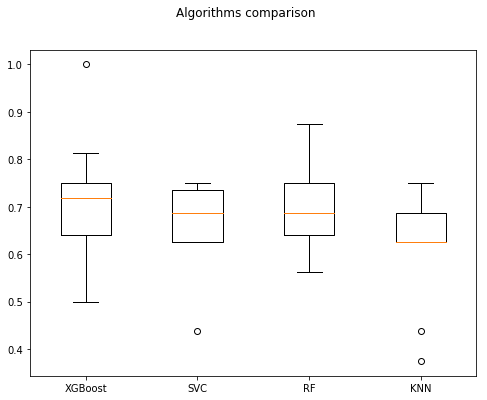

In [21]:
fig = plt.figure(figsize=(8,6))    
fig.suptitle("Algorithms comparison")
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [25]:
models = pd.DataFrame({
        'Model'          : ['XGBoost', 'SVC', 'Random Forest', 'kNN'],
        'Training_Score' : cv_results.mean(),
    })
models.sort_values(by='Training_Score', ascending=False)

,Model,Training_Score
0,XGBoost,0.61875
1,SVC,0.61875
2,Random Forest,0.61875
3,kNN,0.61875
